In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
from gradio.components import Image, Label
import gradio as gr

def is_goat(x): return True

In [3]:
im = PILImage.create("messi.jpg")
im.thumbnail((256,256))
# ?im

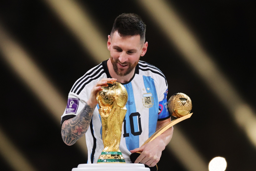

In [4]:
im

In [5]:
#|export
learn = load_learner("model.pkl")

In [6]:
# learn.predict(im)

In [7]:
#|export
# categories = ("GOAT", "Not GOAT")
categories = learn.dls.vocab

def classify_img(img):
    pred_class,pred_idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
# classify_img(im)

In [9]:
#|export
image = Image(shape=(192,192))
label = Label()
examples = ["Messi.jpg", "ronaldo.jpg", "hazard.jpg"]

intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [11]:
import nbdev

In [16]:
nbdev.export.nb_export("app.ipynb", "app")
print("Export Successful")

Export Successful
